In [253]:
import os
os.chdir(r"C:\Users\Degot Charlotte\Documents\GitHub\batch7_satellite_ges")


In [379]:
import pipeline.outlier_detection_peak as od
import pipeline.find_peak as fp
import pandas as pd
import numpy as np
%matplotlib inline
import imp
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'Library'), 'share')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt

In [512]:
#STORE = "https://storage.gra.cloud.ovh.net/v1/AUTH_2aaacef8e88a4ca897bb93b984bd04dd/oco2//datasets/oco-2/soudings/oco2_"

# Test read from OVH storage TODO replace future storage with these paths
# df = pd.read_csv(STORE + "1409.csv.xz", compression="xz")

#get the data for the month of august
df = pd.read_csv("http://courty.fr/OCO2/oco2_1808.csv", sep=";")
df = df.loc[(df['orbit'].isin(list(peaks_detected.orbit.unique()))), :]
df_dis = fp.compute_distance(df)
from datetime import datetime
def to_date(a):
    return datetime.strptime(str(a), '%Y%m%d%H%M%S%f')

df_dis['date'] = df_dis['sounding_id'].apply(to_date)


IncompleteRead: IncompleteRead(11859705 bytes read, 503138683 more expected)

In [429]:
df_dis.head()

orbit       sounding_id   latitude   longitude        xco2  xco2_uncert  \
0  21709  2018080100462105 -33.015541 -164.508881  405.143188     0.491368   
5  21709  2018080100462175 -32.979904 -164.516937  405.248474     0.491248   
4  21709  2018080100462173 -32.988403 -164.476196  404.706451     0.496855   
1  21709  2018080100462137 -32.988529 -164.553787  404.893677     0.497189   
6  21709  2018080100462176 -32.975418 -164.537354  404.594025     0.499444   

   windspeed_u  windspeed_v  surface_pressure_apriori  surface_pressure  \
0     3.749916     9.128431               1016.224304       1011.259888   
5     3.751966     9.100545               1016.247925       1011.493164   
4     3.783962     9.126184               1016.202271       1011.514282   
1     3.720200     9.087859               1016.281677       1012.178101   
6     3.735827     9.087646               1016.270935       1011.547546   

   altitude  land_water_indicator  land_fraction  latitude_orig  \
0       0.0                   1.0            0.0     -33.015541   
5       0.0                   1.0            0.0     -33.015541   
4       0.0                   1.0            0.0     -33.015541   
1       0.0                   1.0            0.0     -33.015541   
6       0.0                   1.0            0.0     -33.015541   

   longitude_orig  distance                    date  
0     -164.508881  0.000000 2018-08-01 00:46:21.050  
5     -164.508881  4.030712 2018-08-01 00:46:21.750  
4     -164.508881  4.286331 2018-08-01 00:46:21.730  
1     -164.508881  5.150252 2018-08-01 00:46:21.370  
6     -164.508881  5.188647 2018-08-01 00:46:21.760

In [365]:
#get the peaks detected for the month of Aug 2018
peaks_detected = pd.read_csv("http://courty.fr/OCO2/result_for_oco2_1808-no_delta")
from datetime import datetime
def to_date(a):
    return datetime.strptime(str(a), '%Y%m%d%H%M%S%f')

peaks_detected['date'] = peaks_detected['sounding_id'].apply(to_date)

peaks_detected = fp.compute_distance(peaks_detected)

In [290]:
peaks_detected.describe()

orbit   Unnamed: 0   sounding_id     latitude    longitude  \
count   2739.000000  2739.000000  2.739000e+03  2739.000000  2739.000000   
mean   21942.401241  1369.000000  2.018082e+15    20.739139    -2.252285   
std      135.804701   790.825518  9.332131e+08    26.381097   105.746297   
min    21709.000000     0.000000  2.018080e+15   -40.021149  -179.779083   
25%    21809.500000   684.500000  2.018081e+15    -3.200449  -111.344830   
50%    21957.000000  1369.000000  2.018082e+15    29.949741    17.073837   
75%    22061.000000  2053.500000  2.018083e+15    40.669176    70.918045   
max    22159.000000  2738.000000  2.018083e+15    72.424393   179.568573   

             slope    intercept    amplitude        sigma        delta  \
count  2739.000000  2739.000000  2739.000000  2739.000000  2739.000000   
mean     -0.001466   404.197221    14.755017    14.784339     0.404124   
std       0.006618     1.975166    17.254139    10.115917     0.443052   
min      -0.031395   398.082968   -50.333415   -33.117778     0.000341   
25%      -0.006007   402.793939     4.555808    10.507821     0.150471   
50%      -0.002799   404.515498    11.298365    15.405412     0.289059   
75%       0.003888   405.924259    20.401056    20.883578     0.498587   
max       0.025194   408.913894   162.436539    33.249874     5.603435   

                 R  windspeed_u  windspeed_v  latitude_orig  longitude_orig  \
count  2739.000000  2739.000000  2739.000000    2739.000000     2739.000000   
mean      0.573809    -1.178559    -0.315456       0.538044       -5.738311   
std       0.193246     4.447457     3.729918      25.365776      106.804389   
min      -0.772979    -9.672325    -9.554490     -40.021149     -179.427689   
25%       0.531893    -4.771674    -3.273640     -20.183781     -115.742714   
50%       0.575454    -1.931059    -0.296885      -4.999902       15.511454   
75%       0.645554     2.321920     2.921310      24.366470       68.364227   
max       0.899008    13.551064    11.974917      71.035431      179.295044   

           distance  
count   2739.000000  
mean    2305.806795  
std     2788.785507  
min        0.000000  
25%       29.901995  
50%      958.862377  
75%     4100.347039  
max    11758.590148

##  Test LOF - Get anomalies

In [492]:
# test by date
#peaks_detected_date = peaks_detected[peaks_detected['date'] < "2018-08-26"]
#peaks_detected_date = peaks_detected_date[peaks_detected_date['date'] > "2018-08-25"]
#peaks_trans = od.add_features(peaks_detected_date, df_dis)
peaks_trans = od.add_features(peaks_detected, df_dis)

peaks_out = peaks_trans.copy()

In [465]:
peaks_trans.describe()

orbit   Unnamed: 0   sounding_id    latitude   longitude  \
count    107.000000   107.000000  1.070000e+02  107.000000  107.000000   
mean   22064.457944  2087.000000  2.018083e+15   30.743406   15.900699   
std        4.512625    31.032241  7.420133e+06   23.327406  114.557709   
min    22059.000000  2034.000000  2.018083e+15  -32.359882 -179.523438   
25%    22061.000000  2060.500000  2.018083e+15   32.934509 -113.538662   
50%    22063.000000  2087.000000  2.018083e+15   37.513374   44.807423   
75%    22068.500000  2113.500000  2.018083e+15   42.086363  116.951366   
max    22072.000000  2140.000000  2.018083e+15   71.055725  170.832687   

            slope   intercept   amplitude       sigma       delta           R  \
count  107.000000  107.000000  107.000000  107.000000  107.000000  107.000000   
mean    -0.003427  402.624076   31.394949   14.454910    0.819925    0.595724   
std      0.005203    2.053698   42.132044    9.312695    1.116176    0.182087   
min     -0.014064  399.688783  -25.218045  -33.117778    0.010229   -0.662657   
25%     -0.007263  400.861543    5.272897   10.764582    0.169059    0.551378   
50%     -0.004944  402.311862   12.454133   14.555363    0.317156    0.604542   
75%      0.000774  403.694637   46.793056   19.777156    1.066964    0.663474   
max      0.009826  407.089086  162.436539   32.274687    5.603435    0.856532   

       windspeed_u  windspeed_v  latitude_orig  longitude_orig     distance  \
count   107.000000   107.000000     107.000000      107.000000   107.000000   
mean     -1.091748     0.388806      -3.765734      -15.746492  3934.952716   
std       3.761819     3.420171      28.197754      120.950346  3464.621693   
min      -7.236558    -5.954427     -32.359882     -179.427689     0.000000   
25%      -3.286225    -2.220180     -22.014317     -153.619949   565.202305   
50%      -1.621046     0.780350     -21.392715       19.768553  4581.605598   
75%       1.158417     2.639013      32.079338       81.551193  7801.942299   
max       8.022303     6.649925      71.035431      133.372955  8242.458828   

       surface_pressure  surface_pressure_apriori  land_water_indicator  \
count        107.000000                107.000000            107.000000   
mean         998.212459                996.651547              0.532710   
std           34.490436                 35.001588              0.501277   
min          853.488403                849.663086              0.000000   
25%          992.718170                991.267059              0.000000   
50%         1010.016174               1007.784607              1.000000   
75%         1018.029205               1016.374298              1.000000   
max         1035.291138               1031.955322              1.000000   

       land_fraction   surf_pres  
count     107.000000  107.000000  
mean       46.728972   -1.560912  
std        50.127680    2.443307  
min         0.000000  -10.093506  
25%         0.000000   -2.916656  
50%         0.000000   -1.794617  
75%       100.000000    0.098175  
max       100.000000    5.233521

In [393]:
#Analysis only on land
#peaks_trans=peaks_trans[peaks_trans['land_water_indicator'] == 0]

In [514]:
peaks_out["y_class_lof"], peaks_out["outlier_score_lof"] = od.detect_outliers_lof(peaks_trans, neighbors=20,
                                                                                  features=["latitude", "longitude", "slope", "intercept",
                                                                      "amplitude", "sigma", "delta", "R"])
peaks_out.y_class_lof.value_counts()

C:\Users\Degot Charlotte\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


 1    2465
-1     274
Name: y_class_lof, dtype: int64

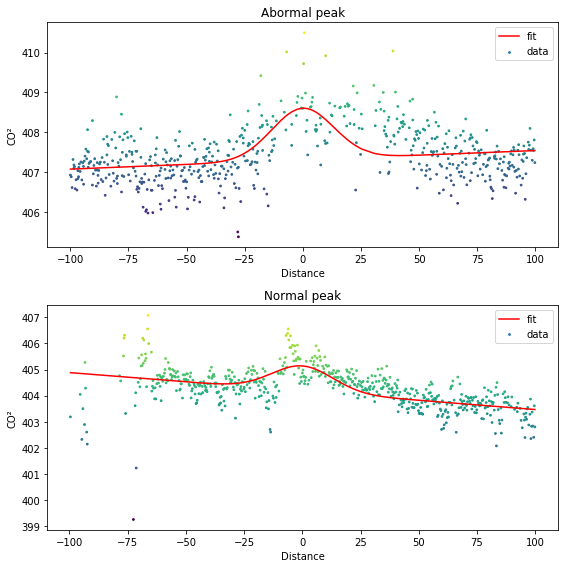

In [515]:
np.random.seed(18)
od.compare_peaks(df_dis, peaks_out, "y_class_lof")


## Test LOF - Draw maps

In [406]:
def draw_map_df(data, x="longitude", y="latitude", c="y_class_lof", lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=20, frontier=False):

    plt.figure(figsize=(45, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
    
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    m.scatter(data[x], data[y], c=data[c], cmap=plt.cm.jet, s=size_point)

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

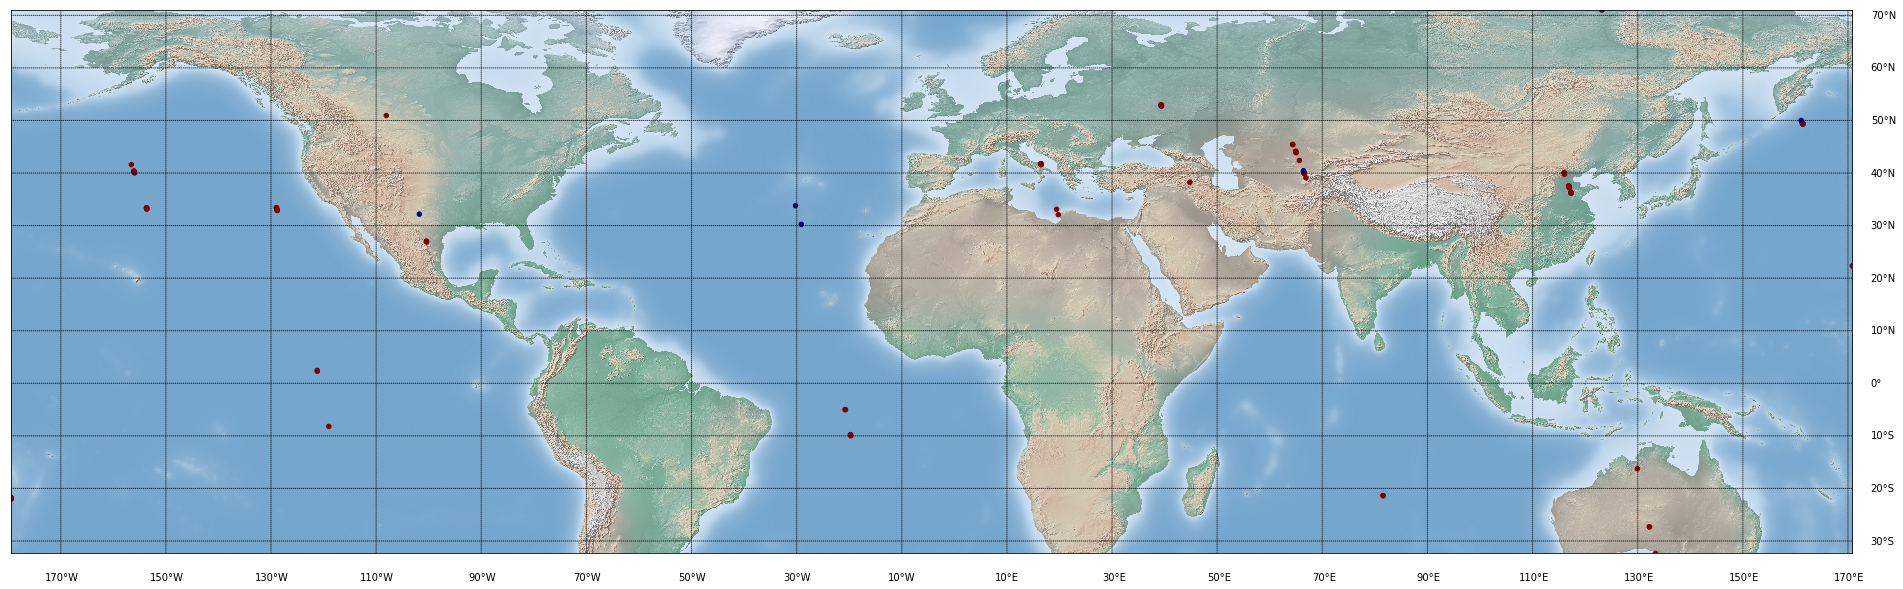

In [468]:
draw_map_df(peaks_out, lon_min=min(peaks_out['longitude']), lon_max=max(peaks_out['longitude']), lat_min=min(peaks_out['latitude']), lat_max=max(peaks_out['latitude']))

In [469]:
peaks_out_abnormal=peaks_out[peaks_out['y_class_lof'] == -1]

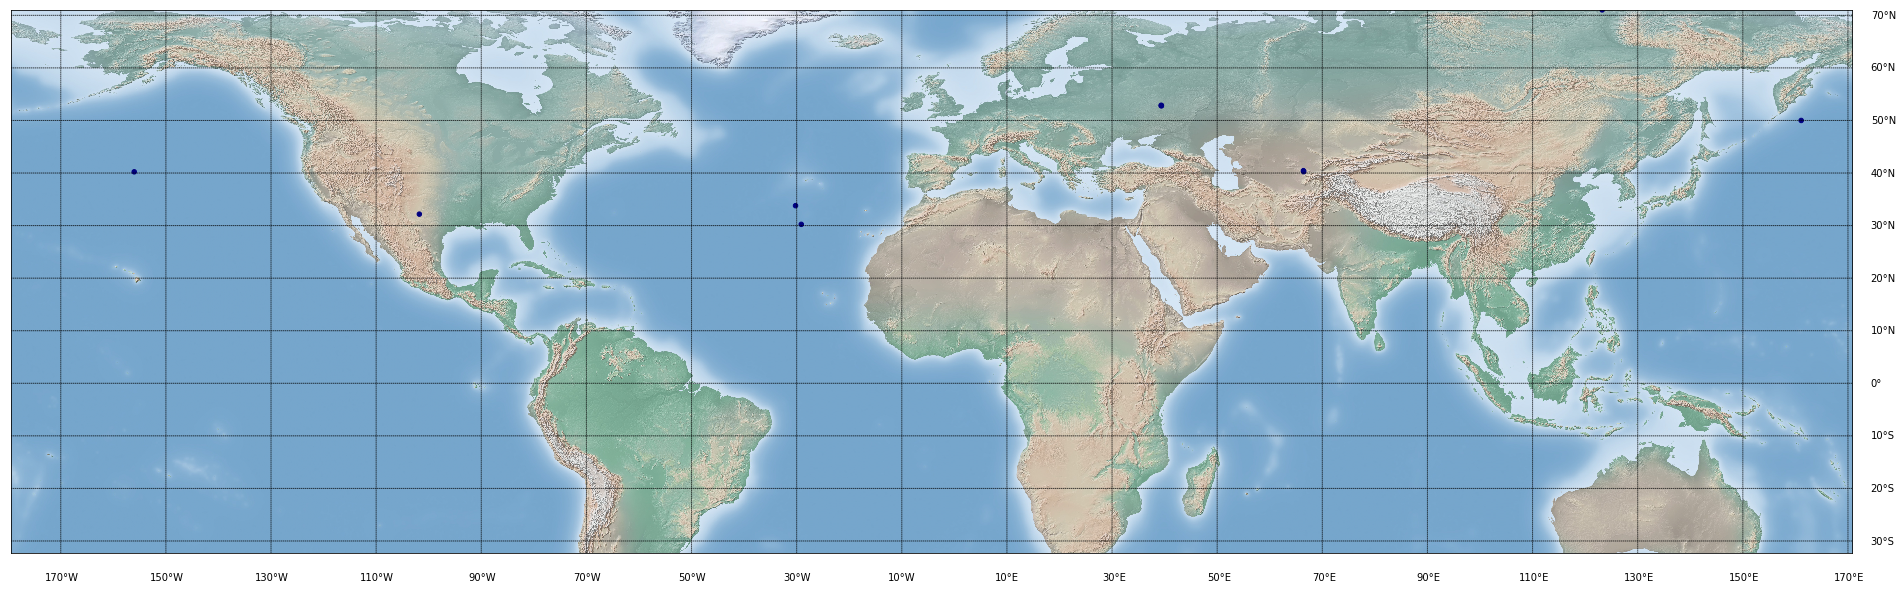

In [470]:
draw_map_df(peaks_out_abnormal, lon_min=min(peaks_out['longitude']), lon_max=max(peaks_out['longitude']), lat_min=min(peaks_out['latitude']), lat_max=max(peaks_out['latitude']))

In [422]:
peaks_out_abnormal.shape

(274, 24)

# Test LOF - draw peaks

In [414]:
peaks_out_abnormal.head()

orbit  Unnamed: 0       sounding_id   latitude   longitude     slope  \
16  22059        2050  2018082502005077  49.998497  161.102264 -0.007583   
49  22063        2083  2018082508332205  40.257069   66.467888 -0.005970   
50  22063        2084  2018082508332607  40.455093   66.400337 -0.008994   
79  22067        2113  2018082515065571  33.789558  -30.215427  0.004512   
80  22070        2114  2018082520011001  26.902960 -100.410713 -0.007021   

     intercept  amplitude      sigma     delta         R  windspeed_u  \
16  399.688783 -12.713098 -20.100414  0.252323  0.579597     6.921911   
49  402.360825  -0.362362 -14.132543  0.010229  0.764921     1.261760   
50  402.471599 -25.218045 -33.117778  0.303781  0.581270     1.199634   
79  403.926048   6.735588   4.909200  0.547362 -0.662657    -4.111475   
80  404.239945  46.612793  11.237847  1.654749  0.645443    -5.430861   

    windspeed_v                    date  latitude_orig  longitude_orig  \
16    -1.202810 2018-08-25 02:00:50.770     -22.014317     -179.427689   
49    -4.008585 2018-08-25 08:33:22.050     -21.392715       81.551193   
50    -4.634050 2018-08-25 08:33:26.070     -21.392715       81.551193   
79    -2.769089 2018-08-25 15:06:55.710      -9.985934      -19.707314   
80     1.956158 2018-08-25 20:01:10.010      26.902960     -100.410713   

       distance  surface_pressure  surface_pressure_apriori  \
16  8229.294417       1017.925049               1015.518127   
49  7026.660085        878.252075                868.158569   
50  7049.391987        902.022095                897.524658   
79  4989.612586       1024.516724               1025.747925   
80     0.000000        897.641052                894.804688   

    land_water_indicator  land_fraction  surf_pres  y_class_lof  \
16                   1.0            0.0  -2.406921           -1   
49                   0.0          100.0 -10.093506           -1   
50                   0.0          100.0  -4.497437           -1   
79                   1.0            0.0   1.231201           -1   
80                   0.0          100.0  -2.836365           -1   

    outlier_score_lof  
16          -2.034957  
49          -1.808973  
50          -2.654195  
79          -3.727392  
80          -1.471789

In [471]:
peaks_out_abnormal.set_index("sounding_id")
df_full=df_dis

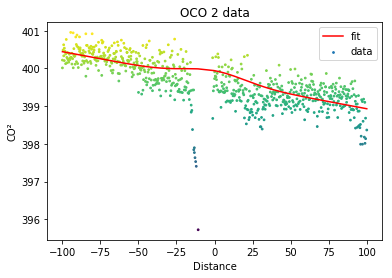

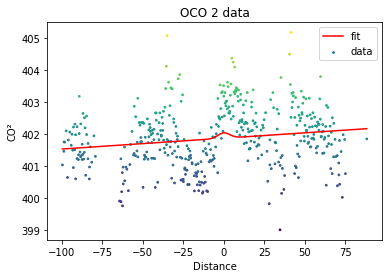

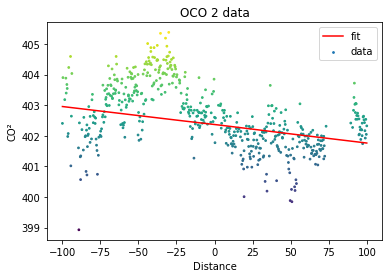

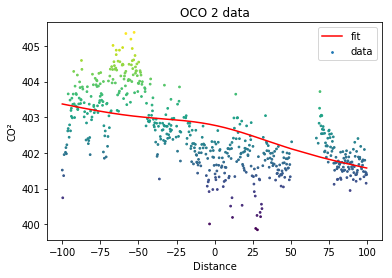

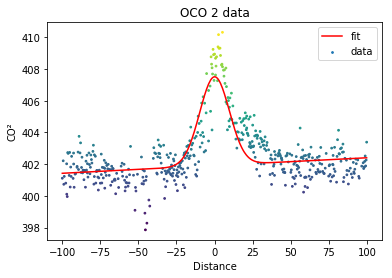

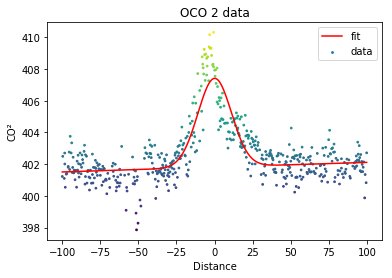

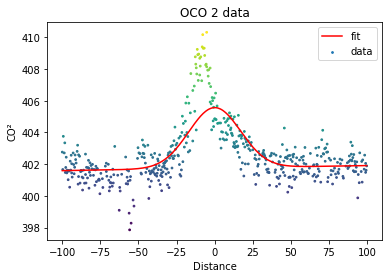

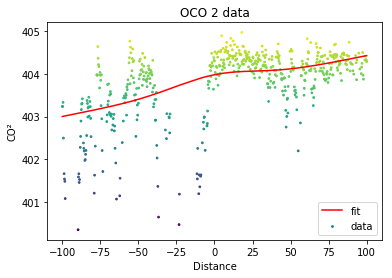

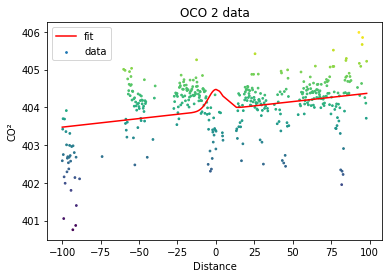

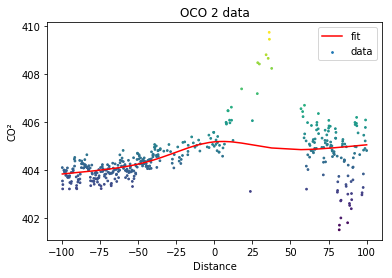

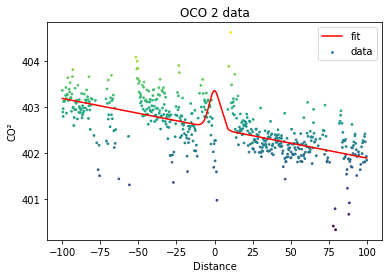

In [472]:
%matplotlib inline

def gaussian(x, m, b, A, sig):
    """
    Function used to fit gaussian in peak_detection
    :param x: float, input data for curve
    :param m: float, slope of the data
    :param b: float, intercept of the data
    :param A: float, curve amplitude
    :param sig: float, standard deviation of curve
    :return: float
    """
    return m * x + b + A / (sig * (2 * np.pi) ** 0.5) * np.exp(-x ** 2 / (2 * sig ** 2))

for i in range(peaks_out_abnormal.shape[0]):
    peak = peaks_out_abnormal.iloc[i]
    window = 200
    df_orbit = df_full[df_full['orbit'] == peak['orbit']]
    km_start = df_orbit.set_index("sounding_id").loc[peak['sounding_id'], 'distance']
    df_slice = df_orbit.query('distance >= (@km_start-@window/2) and distance <= (@km_start + @window/2)').copy()
    x = df_slice['distance'] - km_start
    y = df_slice['xco2']
    plt.scatter(x, y, c=y, s=3, label='data')
    plt.plot(x, gaussian(x, m=peak["slope"], b=peak["intercept"], A=peak["amplitude"], sig=peak["sigma"]), 'r',
             label='fit')
    plt.legend()
    plt.title('OCO 2 data')
    plt.xlabel('Distance')
    plt.ylabel('CO²')
    plt.show()

# # Test clustering

In [493]:
from sklearn.cluster import KMeans


def detect_outliers_kmeans(peaks, features):
    """
    """
    x = peaks.loc[:, features].values
    clusterer = KMeans(n_clusters=5, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    peaks['kmeans_cluster'] = cluster_labels
    return peaks 
   

In [494]:
peaks = detect_outliers_kmeans(peaks_trans, features=[ "slope", "intercept",
                                                                      "amplitude", "sigma", "delta", "R"])

In [495]:
def compare_clusters(df_full, peaks):
    cluster_1 b= peaks.loc[peaks["kmeans_cluster"] == 1, :]
    cluster_2 = peaks.loc[peaks["kmeans_cluster"] == 2, :]
    cluster_3 = peaks.loc[peaks["kmeans_cluster"] == 3, :]
    cluster_4 = peaks.loc[peaks["kmeans_cluster"] == 4, :]
    cluster_0 = peaks.loc[peaks["kmeans_cluster"] == 0, :]
    random_1 = np.random.choice(cluster_1.index)
    random_2 = np.random.choice(cluster_2.index)
    random_3 = np.random.choice(cluster_3.index)
    random_4 = np.random.choice(cluster_4.index)
    random_0 = np.random.choice(cluster_0.index)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(5,1,1)
    plt.title("Cluster_1")
    graph_peak(df_full, cluster_1.loc[random_1, :])
    
    plt.subplot(5,1,2)
    plt.title("Cluster_2")
    graph_peak(df_full, cluster_2.loc[random_2, :])
    
    plt.subplot(5,1,3)
    plt.title("Cluster_3")
    graph_peak(df_full, cluster_3.loc[random_3, :])
        
    plt.subplot(5,1,4)
    plt.title("Cluster_4")
    graph_peak(df_full, cluster_4.loc[random_4, :])
    
    plt.subplot(5,1,5)
    plt.title("Cluster_0")
    graph_peak(df_full, cluster_0.loc[random_0, :])
    
    plt.tight_layout()
    plt.show()
    return None

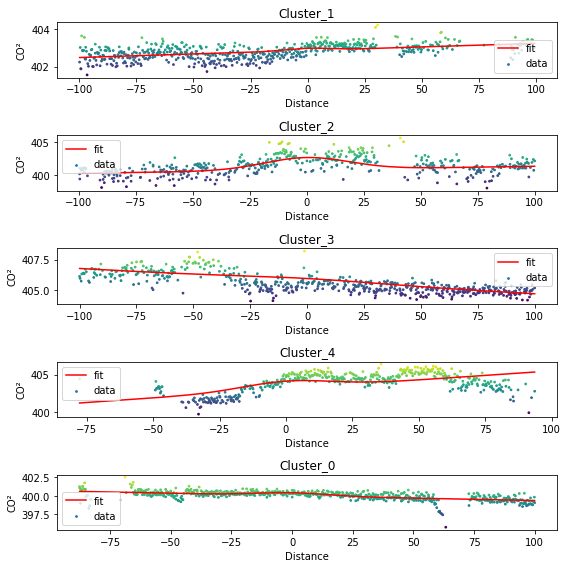

In [496]:
compare_clusters(df_full, peaks)

In [502]:
peaks["kmeans_cluster"].value_counts()

1    1208
0    1039
4     313
3     149
2      30
Name: kmeans_cluster, dtype: int64

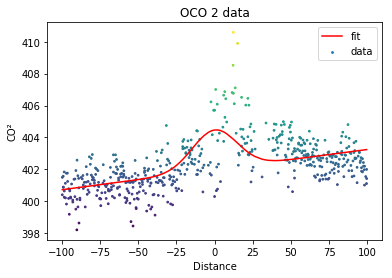

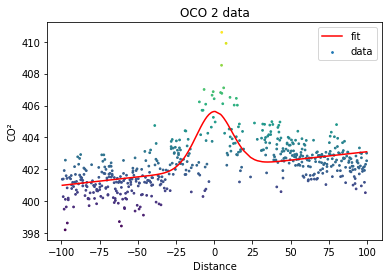

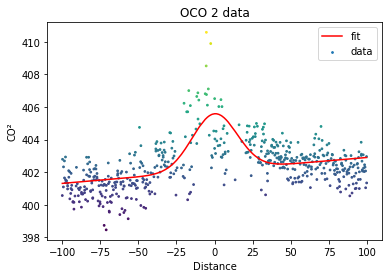

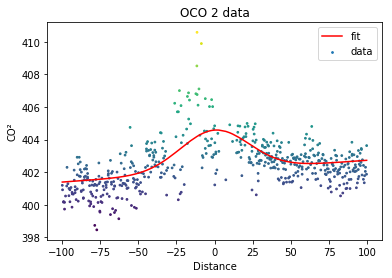

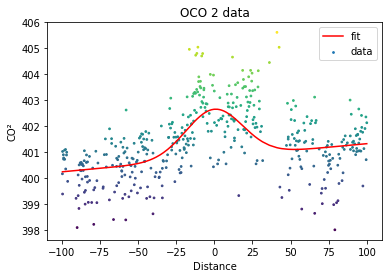

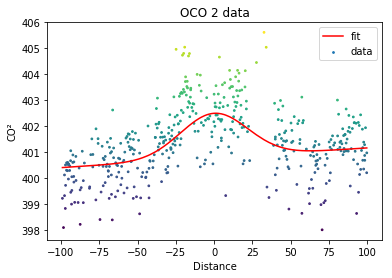

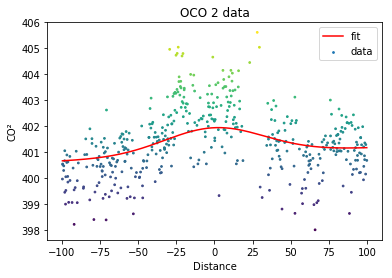

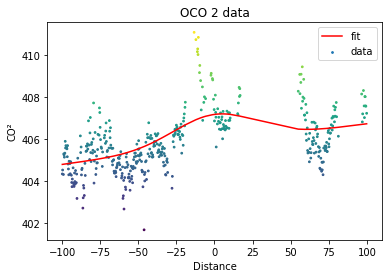

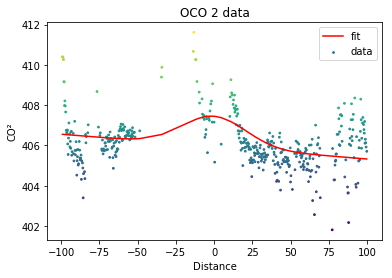

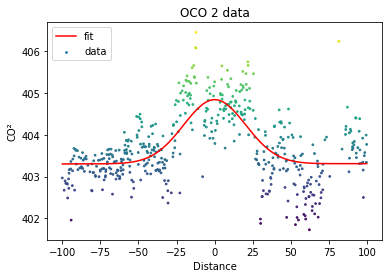

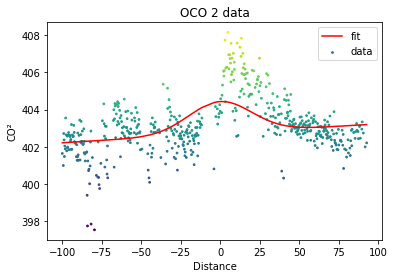

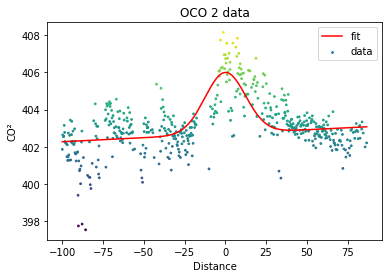

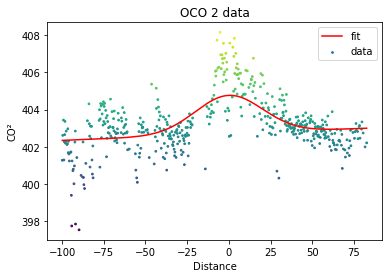

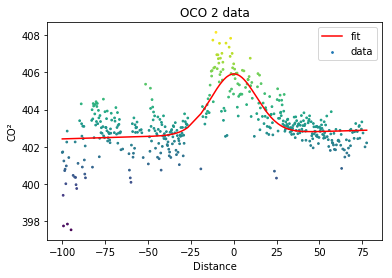

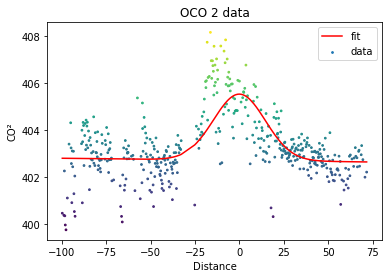

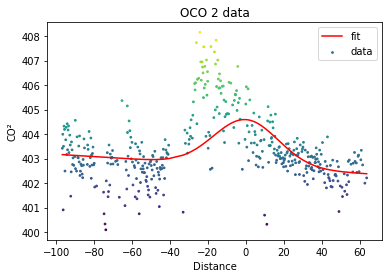

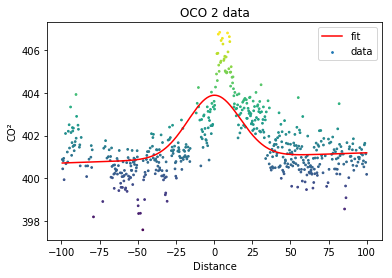

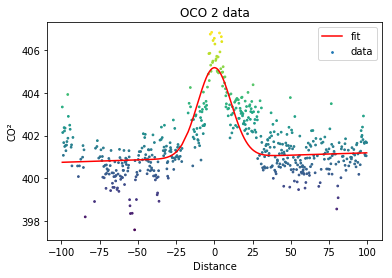

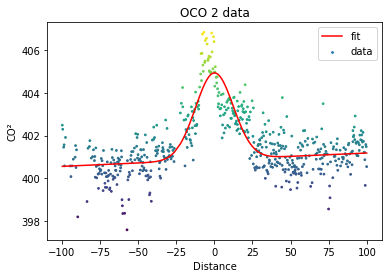

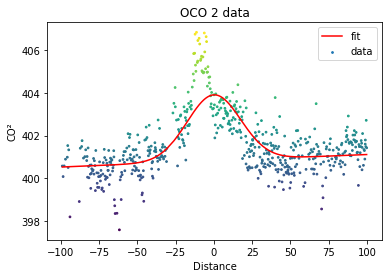

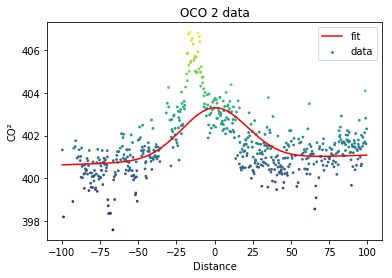

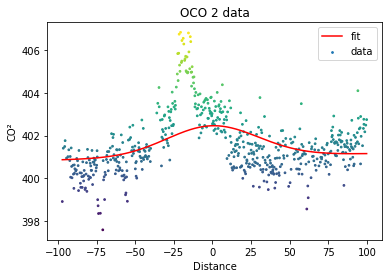

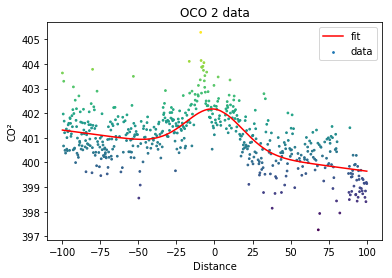

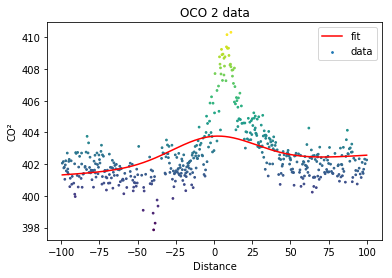

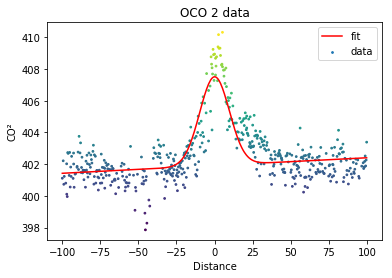

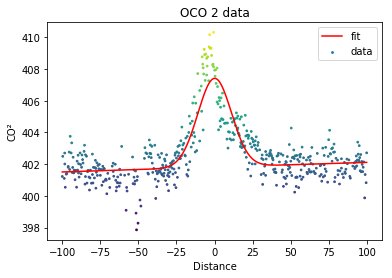

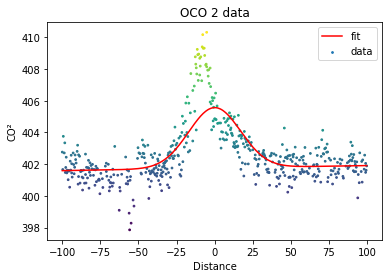

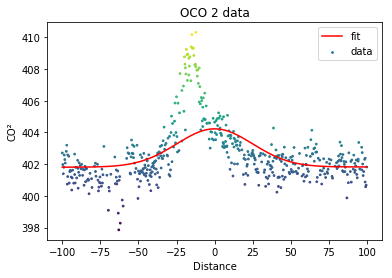

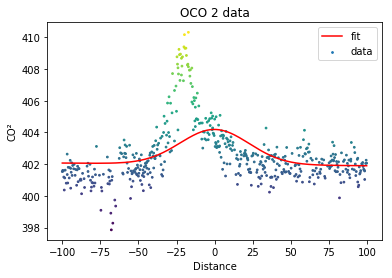

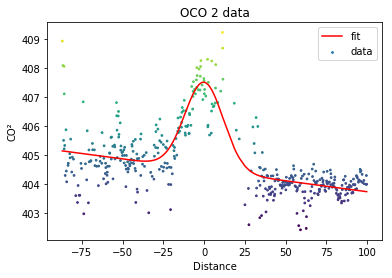

In [499]:
#draw all gaussian from cluster 2
cluster_2 = peaks.loc[peaks["kmeans_cluster"] == 2, :]

for i in range(cluster_2.shape[0]):
    peak = cluster_2.iloc[i]
    window = 200
    df_orbit = df_full[df_full['orbit'] == peak['orbit']]
    km_start = df_orbit.set_index("sounding_id").loc[peak['sounding_id'], 'distance']
    df_slice = df_orbit.query('distance >= (@km_start-@window/2) and distance <= (@km_start + @window/2)').copy()
    x = df_slice['distance'] - km_start
    y = df_slice['xco2']
    plt.scatter(x, y, c=y, s=3, label='data')
    plt.plot(x, gaussian(x, m=peak["slope"], b=peak["intercept"], A=peak["amplitude"], sig=peak["sigma"]), 'r',
             label='fit')
    plt.legend()
    plt.title('OCO 2 data')
    plt.xlabel('Distance')
    plt.ylabel('CO²')
    plt.show()

In [511]:
cluster_2.shape

(30, 23)

In [508]:
def draw_map_df_cluster(data, x="longitude", y="latitude", c="kmeans_cluster", lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=20, frontier=False):

    plt.figure(figsize=(45, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
    
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    m.scatter(data[x], data[y], c=data[c], cmap=plt.cm.jet, s=size_point)

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

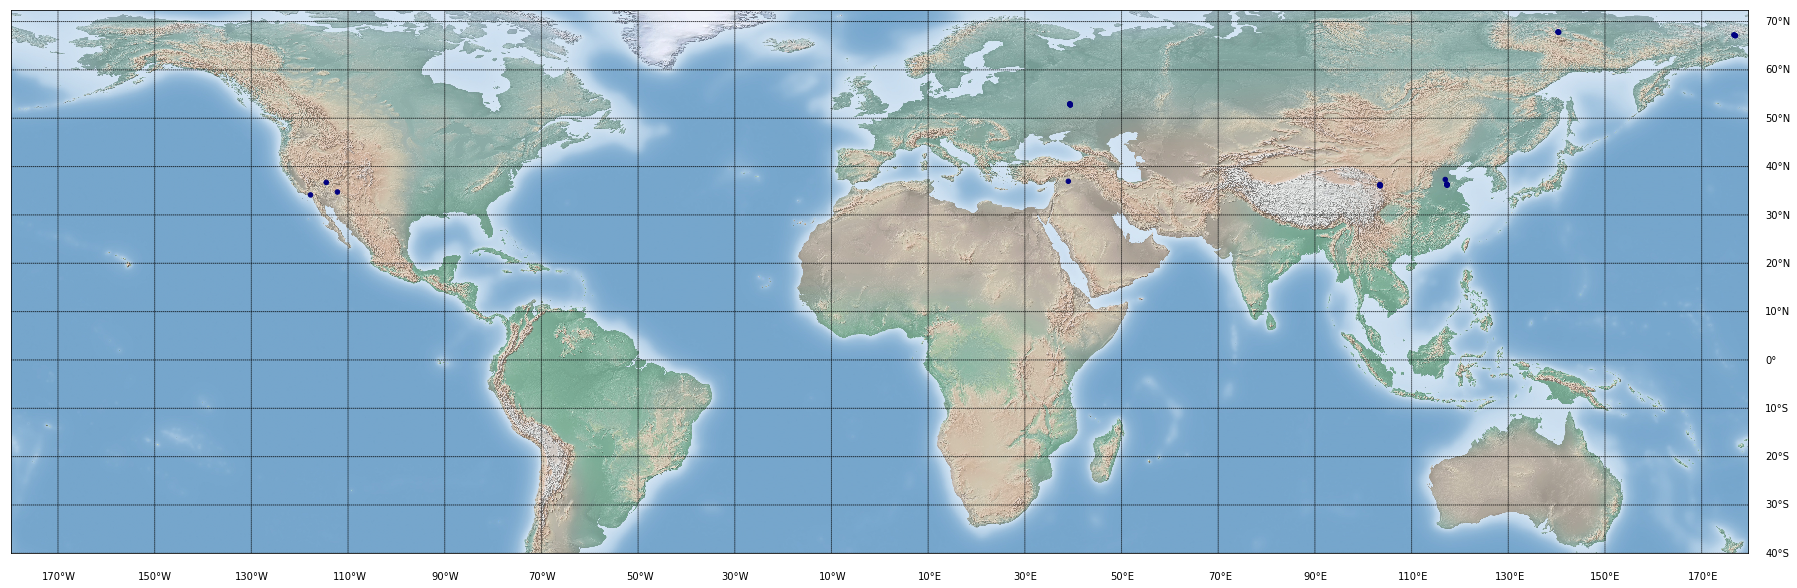

In [509]:
draw_map_df(cluster_2, lon_min=min(peaks_out['longitude']), lon_max=max(peaks_out['longitude']), lat_min=min(peaks_out['latitude']), lat_max=max(peaks_out['latitude']))